---
# **CONVOLUTIONAL NEURAL NETWORK (DEEP LEARNING MODEL) - TensorFlow 2.X**
---
> Flores classification model via Transfer Learning*

> *Dataset*: https://www.kaggle.com/alxmamaev/flowers-recognition

> *Developed by*: **Mirko J. Rodríguez** https://pe.linkedin.com/in/mirkorodriguez

---


##**Loading dataset**
---

**Mount google drive:**

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Download images:**

In [3]:
%%bash
cd "/content/drive/My Drive/courses/deep-learning/deployment-project/flowers/dataset"

# validate if zip exists
FILE=flowers.zip
if [ ! -f "$FILE" ]; then
    echo "File $FILE doesn't exist --> Dowloading ..."
    gdown --id 1--nUAFp7rEzP5ES2F1U-2BQH9lyyIUNQ
fi

# delete folders train and test before unzipping it
rm -rf train test

# unzip dataset (zip) 
unzip -qq $FILE 

File flowers.zip doesn't exist --> Dowloading ...


Downloading...
From: https://drive.google.com/uc?id=1--nUAFp7rEzP5ES2F1U-2BQH9lyyIUNQ
To: /content/drive/My Drive/courses/deep-learning/deployment-project/flowers/dataset/flowers.zip
236MB [00:02, 104MB/s]


## **DATA VISUALIZATION**
---

**Tensorflow version 2.X**

In [30]:
import tensorflow as tf
print('Tensorflow: ',tf.__version__)

from tensorflow import keras
print('TF Keras: ',keras.__version__)

import platform
print('Python:',platform.python_version())

Tensorflow:  2.3.0
TF Keras:  2.4.0
Python: 3.6.9


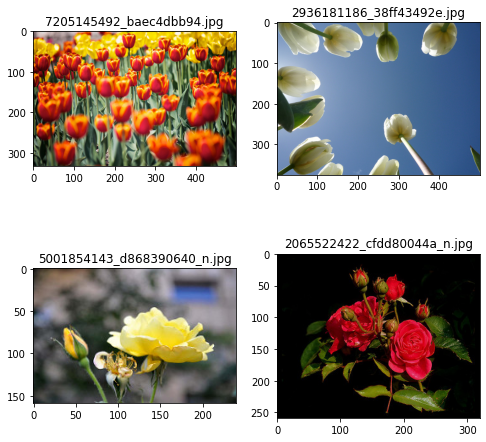

In [5]:
import os
import shutil
import glob
import numpy as np
from random import randrange

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Project main folder
project_folder = "/content/drive/My Drive/courses/deep-learning/deployment-project/flowers"

files_train_tulip = glob.glob(project_folder+"/dataset/train/tulip/*.jpg")
files_test_tulip = glob.glob(project_folder+"/dataset/test/tulip/*.jpg")
files_train_rose = glob.glob(project_folder+"/dataset/train/rose/*.jpg")
files_test_rose = glob.glob(project_folder+"/dataset/test/rose/*.jpg")

# Getting random images form each folder
file_train_tulip = files_train_tulip[randrange(len(files_train_tulip))]
image_train_tulip = image.load_img(file_train_tulip)

file_test_tulip = files_test_tulip[randrange(len(files_test_tulip))]
image_test_tulip = image.load_img(file_test_tulip)

file_train_rose = files_train_rose[randrange(len(files_train_rose))]
image_train_rose = image.load_img(file_train_rose)

file_test_rose = files_test_rose[randrange(len(files_test_rose))]
image_test_rose = image.load_img(file_test_rose)

# Ploting 4 random images
fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.subplot(2,2,1)
plt.imshow(image_train_tulip)
plt.title(file_train_tulip.split("/")[-1])

plt.subplot(2,2,2)
plt.imshow(image_test_tulip)
plt.title(file_test_tulip.split("/")[-1])

plt.subplot(2,2,3)
plt.imshow(image_train_rose)
plt.title(file_train_rose.split("/")[-1])

plt.subplot(2,2,4)
plt.imshow(image_test_rose)
plt.title(file_test_rose.split("/")[-1])

plt.show()


 ## **PART I - DATA PREPROCESSING**
---


**Loading Train dataset folder**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Images preprocessing: Images will be resized to 224x224 pixels
img_width = 224
img_height = 224
batch_size = 48

# Data Augmentation and Normalization
datagen_train = ImageDataGenerator(rescale=1.0/255.0,      # Normalizing images in range [0-1]
                                   horizontal_flip=True,   # Horizontal flip
                                   rotation_range=15,      # Random rotation (clockwise) between 0 and 15 degres
                                   width_shift_range=0.15,  # Move image horizontally 15%
                                   height_shift_range=0.15, # Move image vertically 15%
                                   zoom_range=0.2)          # Zoom in / Zoom out randomly 20% => [80% - 120%]

# Reading images from folder: dataset/train
training_set_imgs = datagen_train.flow_from_directory(project_folder + '/dataset/train',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

# Showing results
num_imgs_training = len(training_set_imgs.filenames)

print("\n")
print("Num. imgs TRAINING:", num_imgs_training)
print("Classes:", training_set_imgs.class_indices)
print("Num. imgs Class [0]:", np.sum(training_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(training_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(training_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(training_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(training_set_imgs.labels == 4, axis=0))

Found 3333 images belonging to 5 classes.


Num. imgs TRAINING: 3333
Classes: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Num. imgs Class [0]: 589
Num. imgs Class [1]: 802
Num. imgs Class [2]: 604
Num. imgs Class [3]: 554
Num. imgs Class [4]: 784


**Loading Test dataset folder**

In [7]:
# Data Normalization
datagen_test = ImageDataGenerator(rescale=1.0/255.0)

# Reading images from folder: dataset/test
testing_set_imgs = datagen_test.flow_from_directory(project_folder+"/dataset/test",
                                                      target_size = (img_width, img_height),
                                                      class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                      shuffle=False)
# Showing results
num_imgs_testing = len(testing_set_imgs.filenames)

print("\n")
print("Num. imgs TEST:", num_imgs_testing)
print("Classes:", testing_set_imgs.class_indices)
print("Num. imgs Class [0]:", np.sum(testing_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(testing_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(testing_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(testing_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(testing_set_imgs.labels == 4, axis=0))

Found 990 images belonging to 5 classes.


Num. imgs TEST: 990
Classes: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Num. imgs Class [0]: 180
Num. imgs Class [1]: 250
Num. imgs Class [2]: 180
Num. imgs Class [3]: 180
Num. imgs Class [4]: 200


---
## **PART II - BUILDING & TRAINING CNN MODEL**
---

**Pretrained model VGG16** 

In [8]:
# VGG
from tensorflow.keras.applications import vgg16

# Loading VGG model
# include_top=False (without classificator)
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
vgg_conv.summary();

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

**Freeze Convolution layers**

In [9]:
for layer in vgg_conv.layers[:]:
    layer.trainable = False

vgg_conv.summary();

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# Validating conv layes are NOT trainable
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b33173198> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b010a8550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7afe5f1588> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7afe5a8fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b01093ef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b010982e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7afe108358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7afe0f5ef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7afe05a4a8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7afe5a9400> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7afdad3fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

**Final CNN architecture:**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Model template
model = Sequential()

# Adding VGG model as base model
model.add(vgg_conv)

# Flatten
model.add(Flatten())

# Clasificator
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(5, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2

**Compiling:**

In [13]:
from tensorflow.keras.optimizers import SGD, Adam

#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

**Entrenamiento:**

In [14]:
%%time

epochs=30
history = model.fit_generator(training_set_imgs, 
                              epochs=epochs,
                              steps_per_epoch=np.ceil(num_imgs_training/batch_size),
                              validation_data=testing_set_imgs,
                              validation_steps=np.ceil(num_imgs_testing/batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
70/70 [==============================] - 59s 840ms/step - loss: 1.4718 - accuracy: 0.4053 - val_loss: 1.0187 - val_accuracy: 0.5919
Epoch 2/30
70/70 [==============================] - 57s 818ms/step - loss: 1.1447 - accuracy: 0.5491 - val_loss: 0.8638 - val_accuracy: 0.6798
Epoch 3/30
70/70 [==============================] - 57s 818ms/step - loss: 1.0135 - accuracy: 0.6121 - val_loss: 0.7854 - val_accuracy: 0.7081
Epoch 4/30
70/70 [==============================] - 56s 804ms/step - loss: 0.9549 - accuracy: 0.6325 - val_loss: 0.9367 - val_accuracy: 0.6505
Epoch 5/30
70/70 [==============================] - 57s 808ms/step - loss: 0.9081 - accuracy: 0.6553 - val_loss: 0.7130 - val_accuracy: 0.7343
Epoch 6/30
70/70 [==============================] - 55s 789ms/step - loss: 0.8718 - accuracy: 0.6697 - val_loss: 0.7007 - val_accuracy: 0.7596
Epoch 7/30
70/70 [==============================] - 56s 796ms/step

**Plotting results:**

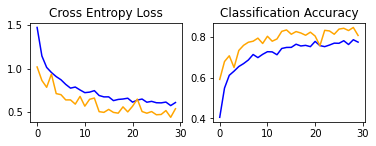

In [15]:
import matplotlib.pyplot as plt

# plot loss
plt.subplot(221)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(222)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

---
## **PART III - MODEL EVALUATION**
---

In [16]:
# Evaluating model
eval = model.evaluate_generator(testing_set_imgs, steps=np.ceil(num_imgs_testing/batch_size))
print('\nValidación en Test:')
print("Loss: {:.4}".format(eval[0]))
print("Accuracy: {:.2%}".format(eval[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.

Validación en Test:
Loss: 0.5394
Accuracy: 80.81%


---
## **PART IV - SAVING MODEL INTO DISK**
---

In [17]:
# Saving as Keras model in 2 separate files:

# 1. Model configuration (json file)
cnn_model_json = model.to_json()
with open(project_folder + "/model/tf2x/keras/split/flowers_model_tf2.json","w") as json_file:
  json_file.write(cnn_model_json)

# 2. Model weights (h5 file)
model.save_weights(project_folder + "/model/tf2x/keras/split/flowers_model_tf2.h5")
print("Modelo guardado en disco ...")

Modelo guardado en disco ...


In [18]:
# Saving full model in a single file:

# Keras format
model.save(project_folder + "/model/tf2x/keras/full/flowers_model_full_tf2.h5", save_format='h5')

# TF2.0 format
version_model="1"
model.save(project_folder + "/model/tf2x/tensorflow/" + version_model + "/", save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/courses/deep-learning/deployment-project/flowers/model/tf2x/tensorflow/1/assets


## **PART V - PREDICTIONS**

In [19]:
# Loading full model Keras (h5) from disk
from tensorflow.keras.models import load_model
# load model
loaded_model = load_model(project_folder + "/model/tf2x/keras/full/flowers_model_full_tf2.h5")
# summarize model
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2

In [20]:
# Loading full model TensorFlow (pb) from disk
from tensorflow.keras.models import load_model
# load model
version="1"
loaded_model = load_model(project_folder + "/model/tf2x/tensorflow/" + version + "/")
print(list(loaded_model.signatures.keys()))
# summarize model
loaded_model.summary()

['serving_default']
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 

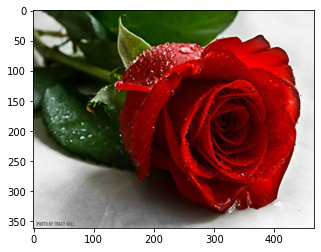

[9.5946547e-05 2.9443452e-04 9.6366739e-01 7.7239721e-04 3.5169795e-02]
Index: 2
Pedicción: Rosa
Prob: 0.9636674


In [21]:
# Making prediction with a test image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


folder_main_samples = project_folder+"/samples"
test_image_path = folder_main_samples + '/img03.jpg'
test_image = image.load_img(test_image_path)
plt.imshow(test_image)
plt.show()

test_image = image.load_img(test_image_path,target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.astype('float32') 
test_image /= 255.0 

predictions = loaded_model.predict(test_image)[0]
print(predictions)
index = np.argmax(predictions)

CLASSES = ['Daisy', 'Dandelion', 'Rosa', 'Girasol', 'Tulipán']
ClassPred = CLASSES[index]
ClassProb = predictions[index]

print("Index:", index)
print("Pedicción:", ClassPred)
print("Prob:", ClassProb)

# print ("\n\n\n\n",testing_set.class_indices)